In [1]:
!pip install mediapipe

In [26]:
import cv2
import mediapipe as mp
import pandas as pd  
import os
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
def image_processed(file_path):
    
    # reading the static image
    hand_img = cv2.imread(file_path)

    # Image processing
    # 1. Convert BGR to RGB
    img_rgb = cv2.cvtColor(hand_img, cv2.COLOR_BGR2RGB)

    # 2. Flip the img in Y-axis
    img_flip = cv2.flip(img_rgb, 1)

    # accessing MediaPipe solutions
    mp_hands = mp.solutions.hands

    # Initialize Hands
    hands = mp_hands.Hands(static_image_mode=True,
    max_num_hands=2, min_detection_confidence=0.7)

    # Results
    output = hands.process(img_flip)

    hands.close()

    try:
        data = output.multi_hand_landmarks[0]
        #print(data)

        data = str(data)

        data = data.strip().split('\n')
        #print(data)
        garbage = ['landmark {', '  visibility: 0.0', '  presence: 0.0', '}']

        without_garbage = []

        for i in data:
            if i not in garbage:
                without_garbage.append(i)

        clean = []

        for i in without_garbage:
            i = i.strip()
            print(i[2:])
            clean.append(i[2:])

        for i in range(0, len(clean)):
            clean[i] = float(clean[i])

        
        return(clean)

    except:
        return(np.zeros([1,63], dtype=int)[0])


In [ ]:
def make_csv():    
    mypath = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
    file_name = open('/kaggle/working/ASLdataset.csv', 'a')

    for each_folder in os.listdir(mypath):
        if '._' in each_folder:
            pass

        else:
            for each_number in os.listdir(mypath + '/' + each_folder):
                if '._' in each_number:
                    pass
                
                else:
                    label = each_folder

                    file_loc = mypath + '/' + each_folder + '/' + each_number

                    data = image_processed(file_loc)
                    
                    try:
                        for i in data:
                            file_name.write(str(i))
                            file_name.write(',')

                        file_name.write(label)
                        file_name.write('\n')
                    
                    except:
                        file_name.write('0')
                        file_name.write(',')

                        file_name.write('None')
                        file_name.write('\n')
       
    file_name.close()
    print('Data Created !!!')

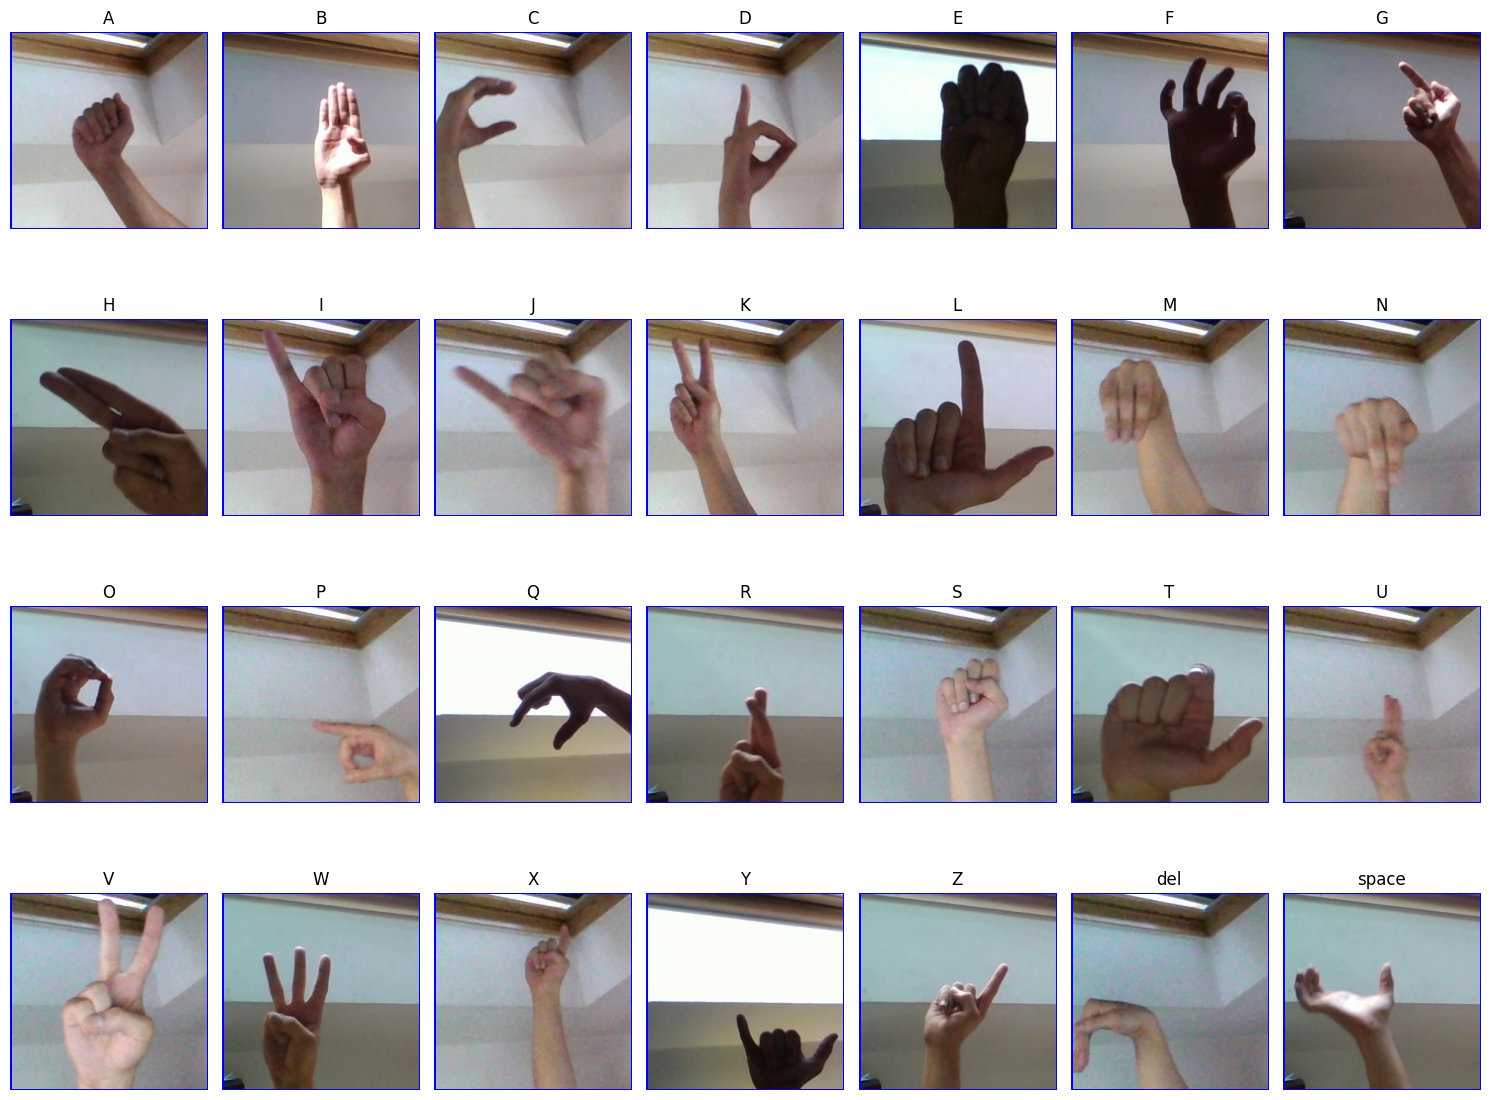

In [79]:
from PIL import Image

PATH_DIR = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'

# Create a figure and axes for subplots
fig, axes = plt.subplots(4, 7, figsize=(15, 12))
dir_names = os.listdir(PATH_DIR)
dir_names.sort()
dir_names.remove('nothing')
for i, dir_name in enumerate(dir_names):
    if i < 28:
        # Calculate the row and column indices for the current image
        row = i // 7
        col = i % 7
        
        file_name = os.listdir(os.path.join(PATH_DIR, dir_name))[0]
        # Construct the file path
        file_path = os.path.join(PATH_DIR, dir_name) + '/' + file_name
        
        # Open the image using PIL
        image = Image.open(file_path)
        
        # Display the image in the corresponding subplot
        axes[row, col].imshow(image)
        axes[row, col].set_title(''.join(char for char in file_name.split('.')[0] if char.isalpha()))
        axes[row, col].axis('off')
    

# Adjust the layout and spacing of subplots
plt.tight_layout()
plt.savefig('/kaggle/working/asl.png')
# Show the figure
plt.show()


In [ ]:
make_csv()

In [9]:
df = pd.read_csv('/kaggle/working/ASLdataset.csv', header=None)
df = df.rename(columns={63: 'Output'})
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.545298,0.565069,-1.173454e-06,0.452673,0.564902,-0.083460,0.372391,0.556066,-0.152449,0.358871,...,0.665590,0.658643,-0.177895,0.619448,0.687225,-0.168279,0.604609,0.670182,-0.157439,N
1,0.252634,0.632876,-2.280617e-07,0.186130,0.660975,-0.076293,0.151073,0.694649,-0.135689,0.163175,...,0.399059,0.763323,-0.150719,0.363971,0.791950,-0.147783,0.339984,0.796517,-0.145432,N
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,N
3,0.186303,0.580186,-7.474423e-07,0.116449,0.574874,-0.060361,0.054023,0.568978,-0.113023,0.041240,...,0.302463,0.580568,-0.136776,0.279428,0.622058,-0.133566,0.259120,0.643379,-0.124012,N
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,N


## Data Cleaning

In [10]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (87000, 64)


In [11]:
# removing null values from our dataset

all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values))
df.drop(all_null_values.index, inplace=True)

Number of null values = 27290


In [12]:
all_nothing_values = df[df.iloc[:, 63] == 'nothing']
print("Number of nothing values =", len(all_nothing_values))

Number of nothing values = 1


In [13]:
# dropping those nothing values from our dataset

df.drop(all_nothing_values.index, inplace=True)

In [14]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (59709, 64)


## Data Preparation

In [15]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (59709, 63)
Labels shape = (59709,)


## Data Split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Model Making

### SVM

In [17]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')

In [18]:
svm.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [19]:
print("Training score =", svm.score(x_train, y_train))

Training score = 0.9981577239516821


In [20]:
y_pred = svm.predict(x_test)

In [21]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9965667392396583


## Visualization

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9965667392396583, 0.9965667392396583, 0.9965667392396583)

<Axes: title={'center': 'Confusion Matrix - American Sign Language (SVM)'}>

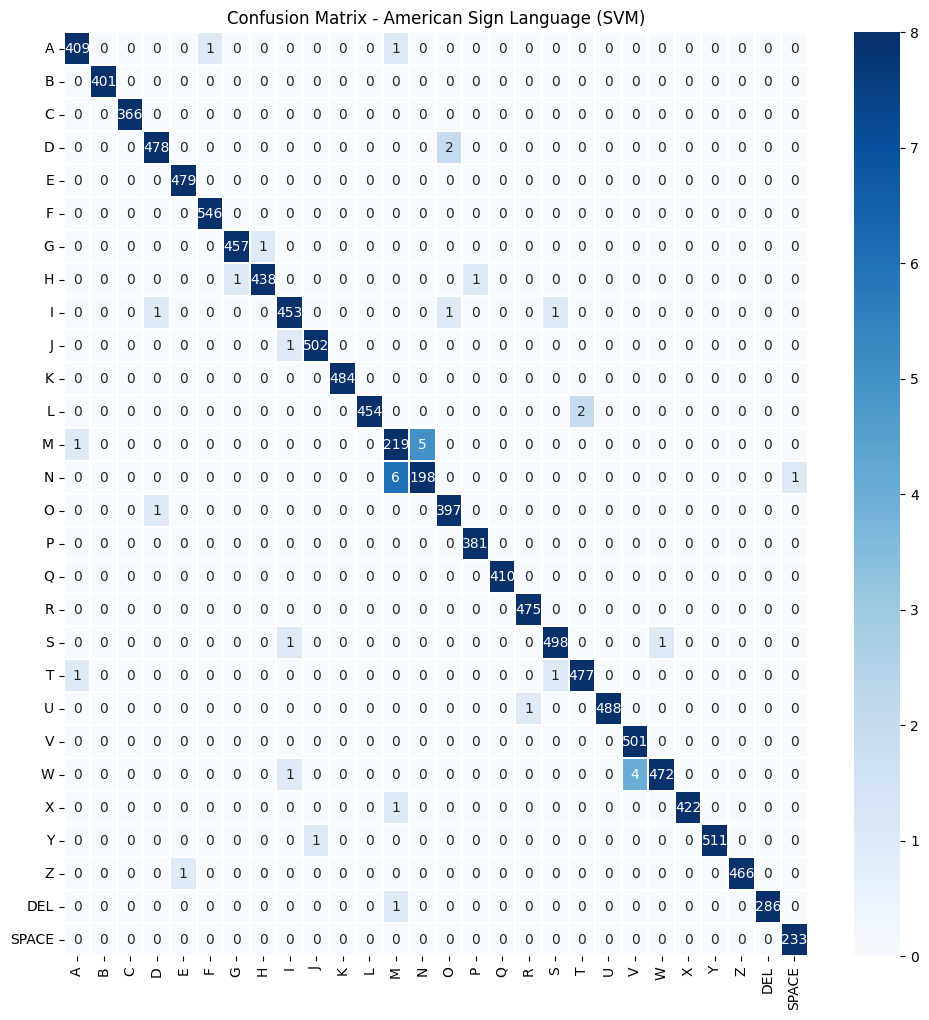

In [28]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language (SVM)")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [29]:
maping.figure.savefig("/kaggle/working/output_svm.png")

In [30]:
import joblib

# save
joblib.dump(svm, "/kaggle/working/model_svm.pkl") 

['/kaggle/working/model_svm.pkl']

### CNN

In [31]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_test.shape)

(47767, 63)
(11942, 63)
(47767, 63, 1)
(11942, 63, 1)


In [32]:
# Number of classes
num_classes = 28

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
# Using the Keras.Utils to put the label categorically 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [33]:
label_encoder.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'del', 'space'], dtype=object)

In [34]:
# One Dimensional Convolutional Neural Network model, Train will be feed to 1 Dimension Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 63, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 63, 32)         │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 31, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 31, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 31, 64)         │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 15, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 15, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 7, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 7, 256)         │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │        14,364 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,059,452 (4.04 MB)

 Trainable params: 1,059,452 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [36]:
#Train the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=24, validation_data=(x_val, y_val))

Epoch 1/10
  33/1593 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0301 - loss: 3.3327    

I0000 00:00:1713428345.985674     963 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1593/1593 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.4408 - loss: 1.7635 - val_accuracy: 0.9306 - val_loss: 0.2279
Epoch 2/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9072 - loss: 0.2886 - val_accuracy: 0.9346 - val_loss: 0.2182
Epoch 3/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9352 - loss: 0.2017 - val_accuracy: 0.9358 - val_loss: 0.2252
Epoch 4/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9509 - loss: 0.1494 - val_accuracy: 0.9546 - val_loss: 0.1454
Epoch 5/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9582 - loss: 0.1354 - val_accuracy: 0.9683 - val_loss: 0.1014
Epoch 6/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9590 - loss: 0.1247 - val_accuracy: 0.9718 - val_loss: 0.0904
Epoch 7/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9673 - loss: 0.1036 - val_accuracy: 0.9628 - val_loss: 0.1248
Epoch 8/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9700 - loss: 0.0949 - val_accur

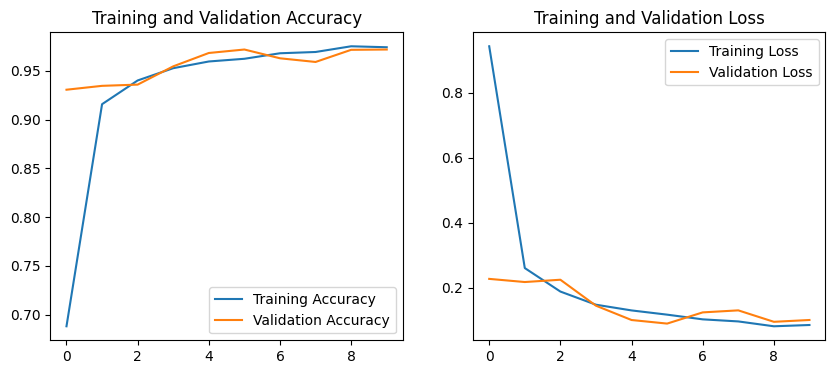

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# This code is used to plot the training and validation accuracy
epochs_range = range(len(acc))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [38]:
y_test_decode = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=-1)
cf_matrix = confusion_matrix(y_test_decode, y_pred)
f1 = f1_score(y_test_decode, y_pred, average='micro')
recall = recall_score(y_test_decode, y_pred, average='micro')
precision = precision_score(y_test_decode, y_pred, average='micro')
f1, recall, precision

374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


(0.9713615809747111, 0.9713615809747111, 0.9713615809747111)

<Axes: title={'center': 'Confusion Matrix - American Sign Language (CNN)'}>

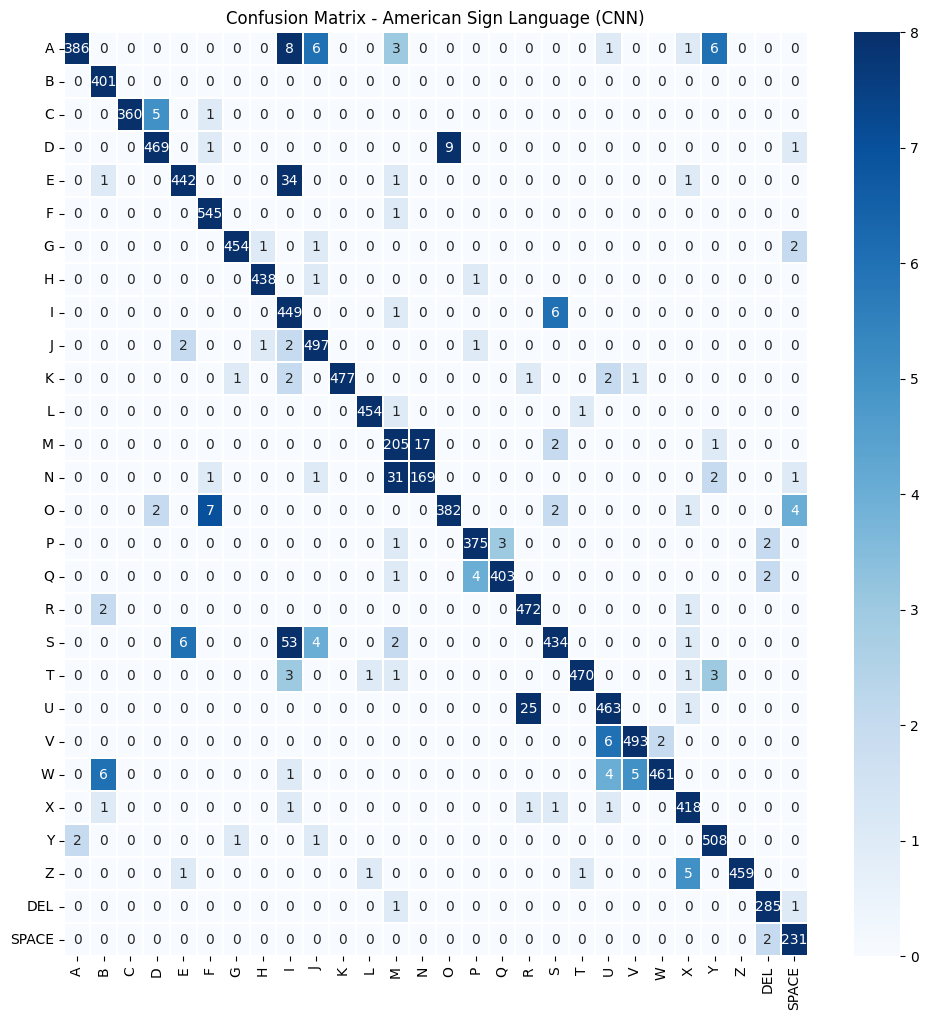

In [39]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language (CNN)")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
maping.figure.savefig("output_cnn.png")

In [40]:
#Saving the model into H5 system file
save_model = "/kaggle/working/model_cnn.h5"
model.save(save_model)
print("Model Saved into", save_model)

Model Saved into /kaggle/working/model_cnn.h5


In [43]:
new_model = tf.keras.models.load_model(save_model)
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 63, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 63, 32)         │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 31, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 31, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 31, 64)         │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 15, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 15, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 7, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 7, 256)         │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │        14,364 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,059,454 (4.04 MB)

 Trainable params: 1,059,452 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [47]:
# Define the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 28)             │         1,820 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,268 (71.36 KB)

 Trainable params: 18,268 (71.36 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#Train the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=24, validation_data=(x_val, y_val))

Epoch 1/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4968 - loss: 1.9480 - val_accuracy: 0.8812 - val_loss: 0.4092
Epoch 2/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9186 - loss: 0.3336 - val_accuracy: 0.9227 - val_loss: 0.2686
Epoch 3/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9485 - loss: 0.2317 - val_accuracy: 0.9558 - val_loss: 0.1896
Epoch 4/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9604 - loss: 0.1754 - val_accuracy: 0.9717 - val_loss: 0.1453
Epoch 5/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9675 - loss: 0.1460 - val_accuracy: 0.9611 - val_loss: 0.1530
Epoch 6/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9688 - loss: 0.1300 - val_accuracy: 0.9691 - val_loss: 0.1240
Epoch 7/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9708 - loss: 0.1200 - val_accuracy: 0.9820 - val_loss: 0.0911
Epoch 8/10
1593/1593 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9750 - loss: 0.1035 - 

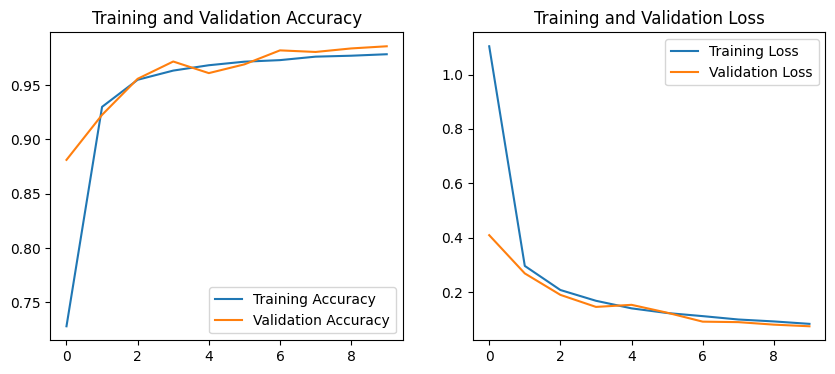

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# This code is used to plot the training and validation accuracy
epochs_range = range(len(acc))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [50]:
y_test_decode = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=-1)
cf_matrix = confusion_matrix(y_test_decode, y_pred)
f1 = f1_score(y_test_decode, y_pred, average='micro')
recall = recall_score(y_test_decode, y_pred, average='micro')
precision = precision_score(y_test_decode, y_pred, average='micro')
f1, recall, precision

374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(0.9851783620834031, 0.9851783620834031, 0.9851783620834031)

<Axes: title={'center': 'Confusion Matrix - American Sign Language (ANN)'}>

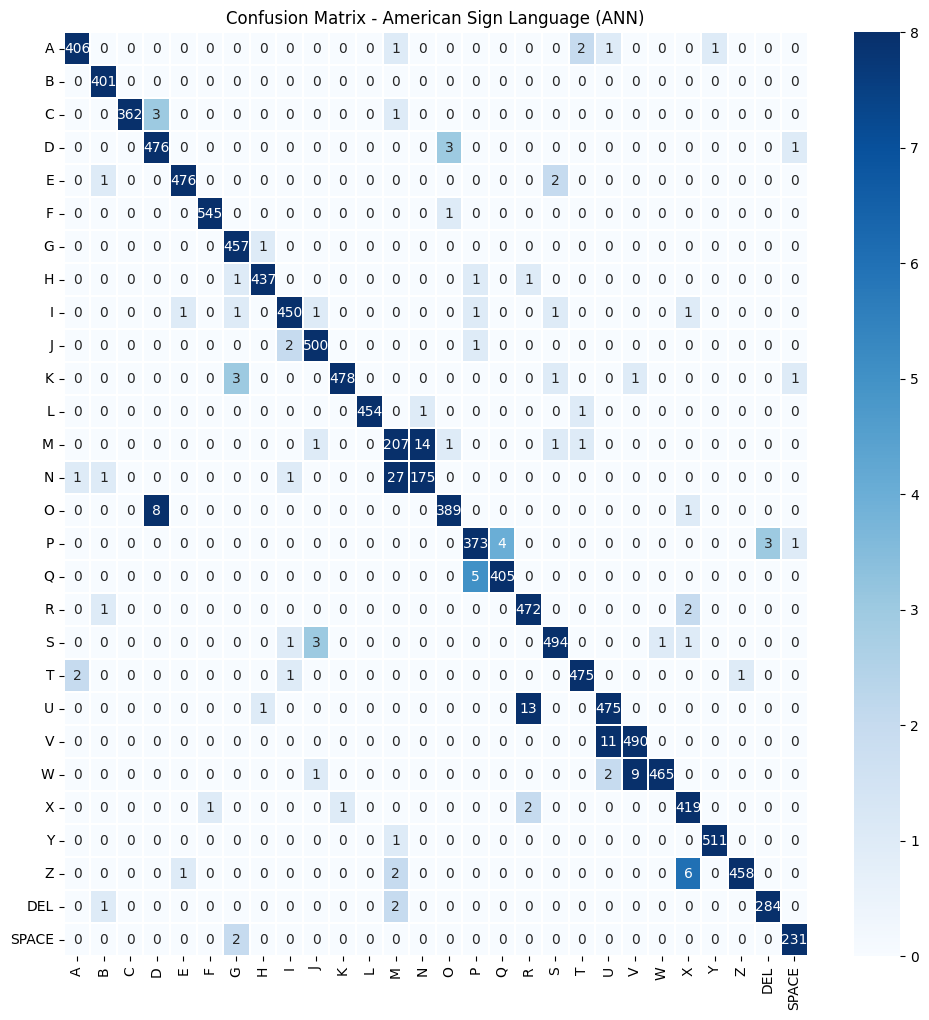

In [51]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language (ANN)")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [54]:
maping.figure.savefig("output_ann.png")

In [53]:
#Saving the model into H5 system file
save_model = "/kaggle/working/model_ann.h5"
model.save(save_model)
print("Model Saved into", save_model)

Model Saved into /kaggle/working/model_ann.h5
